In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy


bios = 2800

In [2]:
# Helper functions
def remove_trail(string):
    to_return =  string.split('_')
    to_return.pop()
    return ''.join(to_return)


def remove_slash(string):
    return string.removesuffix('/')

In [3]:
# Get barcode data in
barcode_df = pd.read_csv('BIOS{bios}_2000_bc1_analysis.csv')

# Remove trailing number for conditions
barcode_df['Condition'] = barcode_df['Condition'].apply(remove_trail)
# Remove slash from index
barcode_df['Index'] = barcode_df['Index'].apply(remove_slash)
# Make column with complete barcode + index (as you'll find in count tables)
barcode_df['Barcode_Index'] = barcode_df['Index']+barcode_df['Complete barcode']

In [4]:
# Get list of unique conditions, but as list (i know extra casting seems silly but is needed)
conditions = list(set(list(barcode_df['Condition'])))

In [5]:
# Get the table of the experiment of interest
df_bios_all = pd.read_csv('2000_thr_concatenated_read_count_{bios}.csv')

In [6]:
# Separate df_bios_all into 2 dfs, one per index

# Get list of cols of interest
cols_s1 = ['Geneid']
cols_s2 = ['Geneid']

for col in df_bios_all.columns:
    if col.startswith('2000_S01_S1'):
        cols_s1.append(col)
    elif col.startswith('2000_S02_S2'):
        cols_s2.append(col)


df_s1 = df_bios_all[cols_s1]
df_s2 = df_bios_all[cols_s2]



In [7]:
# Initialise s1 condition df
conditions_df_s1 = pd.DataFrame(columns=['Geneid', *conditions])
conditions_df_s1['Geneid'] = df_s1['Geneid']
conditions_df_s1 = conditions_df_s1.fillna(0)


In [8]:
# Same for s2
conditions_df_s2 = pd.DataFrame(columns=['Geneid', *conditions])
conditions_df_s2['Geneid'] = df_s2['Geneid']
conditions_df_s2 = conditions_df_s2.fillna(0)


In [9]:
# For column in df_bios_all
for name, column in df_s1.items():
    # print(name, column)
    # If the name of the column is a barcode, determine the condition and add to it
    print(name)
    if name in list(barcode_df['Barcode_Index']):
        condition = barcode_df.loc[barcode_df['Barcode_Index'] == name, 'Condition'].tolist()[0]
        conditions_df_s1[condition] += column
        

Geneid
2000_S01_S1AAACATCGAGAGTCAACACTTCGA
2000_S01_S1AAACATCGGACTAGTACAGCGTTA
2000_S01_S1AACAACCAAACAACCAACACAGAA
2000_S01_S1AACAACCAAGTGGTCAACATTGGC
2000_S01_S1AACAACCACGAACTTACCGAAGTA
2000_S01_S1AACCGAGAAACGCTTAACAAGCTA
2000_S01_S1AACCGAGAACGCTCGAAGATCGCA
2000_S01_S1AACGCTTAACGTATCACATACCAA
2000_S01_S1AACGCTTACAGCGTTACGCTGATC
2000_S01_S1AACGCTTACGCATACACGCATACA
2000_S01_S1AACGTGATAAACATCGCACTTCGA
2000_S01_S1AACGTGATAAGACGGACTGGCATA
2000_S01_S1AACGTGATAGCAGGAAACCTCCAA
2000_S01_S1AACGTGATAGTGGTCACATCAAGT
2000_S01_S1AACGTGATCCGAAGTAAAGGTACA
2000_S01_S1AAGACGGAACTATGCAAGAGTCAA
2000_S01_S1ACAAGCTAAACGTGATAGCAGGAA
2000_S01_S1ACAAGCTACGCATACAAACCGAGA
2000_S01_S1ACACAGAAAACCGAGAACAAGCTA
2000_S01_S1ACACAGAAACAAGCTAAGCAGGAA
2000_S01_S1ACACAGAACAACCACAAGAGTCAA
2000_S01_S1ACACAGAACACTTCGACACTTCGA
2000_S01_S1ACACAGAACTGGCATAACATTGGC
2000_S01_S1ACACAGAAGAATCTGAACCTCCAA
2000_S01_S1ACACAGAAGAATCTGACAGCGTTA
2000_S01_S1ACACAGAAGATAGACAACATTGGC
2000_S01_S1ACATTGGCAGATCGCAATGCCTAA
2000_S01_S1ACATTGGCCA

In [10]:
# For column in df_bios_all
for name, column in df_s2.items():
    # print(name, column)
    # If the name of the column is a barcode, determine the condition and add to it
    print(name)
    if name in list(barcode_df['Barcode_Index']):
        condition = barcode_df.loc[barcode_df['Barcode_Index'] == name, 'Condition'].tolist()[0]
        conditions_df_s2[condition] += column

Geneid
2000_S02_S2AAACATCGAAACATCGAGCAGGAA
2000_S02_S2AAACATCGAACGCTTACATACCAA
2000_S02_S2AAACATCGACACAGAACAATGGAA
2000_S02_S2AAACATCGACGTATCACGAACTTA
2000_S02_S2AAACATCGAGATCGCAGCCACATA
2000_S02_S2AAACATCGAGTCACTAAGAGTCAA
2000_S02_S2AAACATCGCAAGACTACGAACTTA
2000_S02_S2AAACATCGCGCATACACGACTGGA
2000_S02_S2AAACATCGCTGAGCCACAATGGAA
2000_S02_S2AACAACCAAACGTGATAGATCGCA
2000_S02_S2AACAACCAAGTCACTAACATTGGC
2000_S02_S2AACAACCAAGTCACTAAGAGTCAA
2000_S02_S2AACAACCAAGTGGTCACTGTAGCC
2000_S02_S2AACAACCACAACCACAACCACTGT
2000_S02_S2AACAACCACAACCACAGAATCTGA
2000_S02_S2AACAACCACAATGGAAGCCACATA
2000_S02_S2AACAACCACAGCGTTACTGTAGCC
2000_S02_S2AACAACCACGCATACACTGAGCCA
2000_S02_S2AACAACCACTCAATGAAGTACAAG
2000_S02_S2AACAACCAGACTAGTACTGAGCCA
2000_S02_S2AACAACCAGATAGACACAATGGAA
2000_S02_S2AACAACCAGATAGACACTGAGCCA
2000_S02_S2AACCGAGAAGCAGGAAACACAGAA
2000_S02_S2AACCGAGAAGCAGGAACTGAGCCA
2000_S02_S2AACCGAGAAGTCACTAAGTGGTCA
2000_S02_S2AACCGAGAAGTGGTCACAATGGAA
2000_S02_S2AACCGAGACAATGGAACACTTCGA
2000_S02_S2AACCGAGACG

In [11]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(conditions_df_s1['PBMC-cultured'], conditions_df_s2['PBMC-cultured'])


r_value


0.9392396371611749

0.9392396371611749


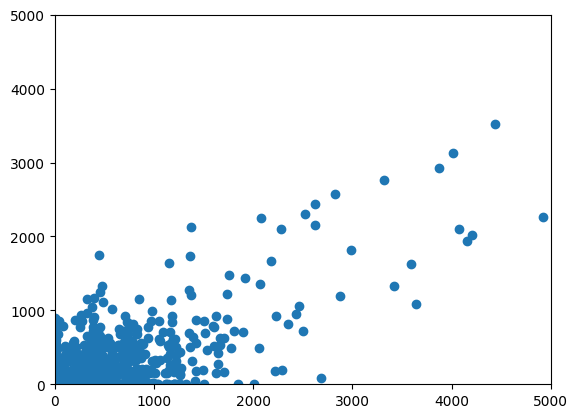

In [17]:
plt.scatter(conditions_df_s1['PBMC-cultured'], conditions_df_s2['PBMC-cultured'])

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(conditions_df_s1['PBMC-cultured'], conditions_df_s2['PBMC-cultured'])
print(r_value)

plt.xlim(0,5000)
plt.ylim(0,5000)

plt.show()

0.9837969487127876


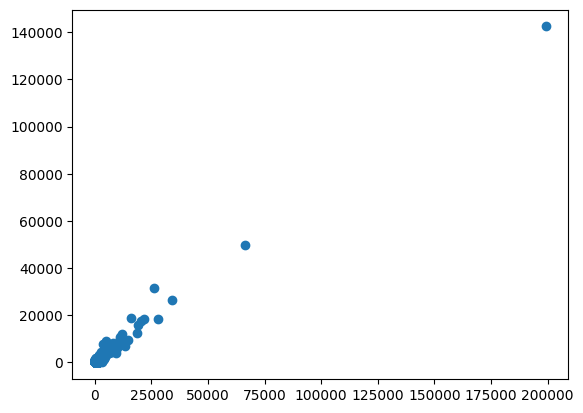

In [13]:
plt.scatter(conditions_df_s1['PBMC-no-culture'], conditions_df_s2['PBMC-no-culture'])

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(conditions_df_s1['PBMC-no-culture'], conditions_df_s2['PBMC-no-culture'])
print(r_value)

plt.show()

#'PBMC-no-culture', 'CD3-T-lymphocyte', 'CD19-B-lymphocyte', 'PBMC-no-culture'

0.9555208449887125


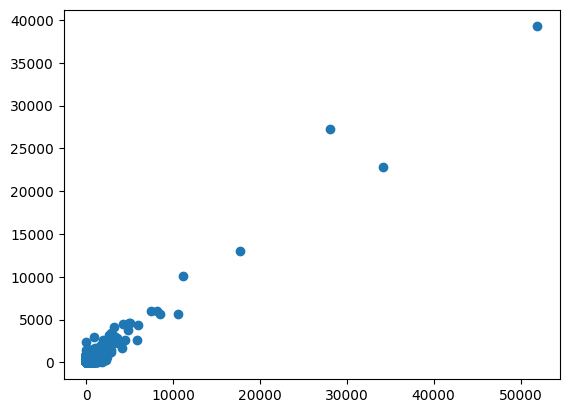

In [14]:
plt.scatter(conditions_df_s1['CD3-T-lymphocyte'], conditions_df_s2['CD3-T-lymphocyte'])

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(conditions_df_s1['CD3-T-lymphocyte'], conditions_df_s2['CD3-T-lymphocyte'])
print(r_value)

plt.show()

0.8420656112194305


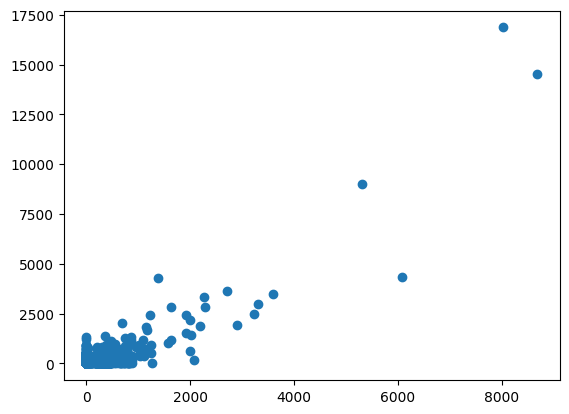

In [15]:
plt.scatter(conditions_df_s1['CD19-B-lymphocyte'], conditions_df_s2['CD19-B-lymphocyte'])

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(conditions_df_s1['CD19-B-lymphocyte'], conditions_df_s2['CD19-B-lymphocyte'])
print(r_value)

plt.show()